In [5]:

from pandas import read_csv
A = read_csv(r"C:\Users\ashishkumd2\Desktop\SOurcs\ML\Datsets\Cars93.csv")

A

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [3]:
cat = []
con = []
for i in A.columns:
   if(A[i].dtypes=="object"):
       cat.append(i)
   else:
       con.append(i)

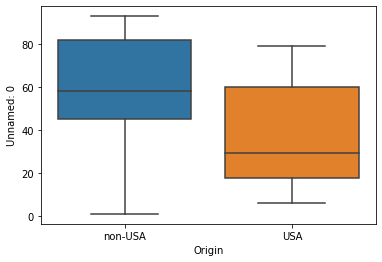

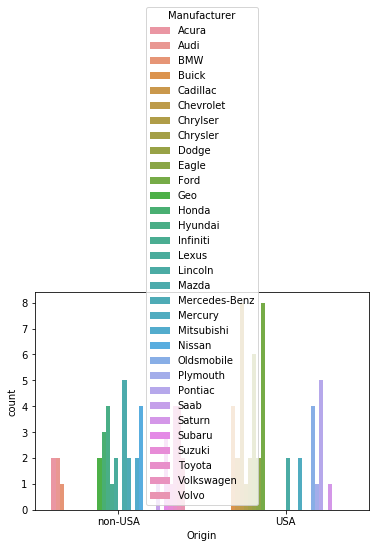

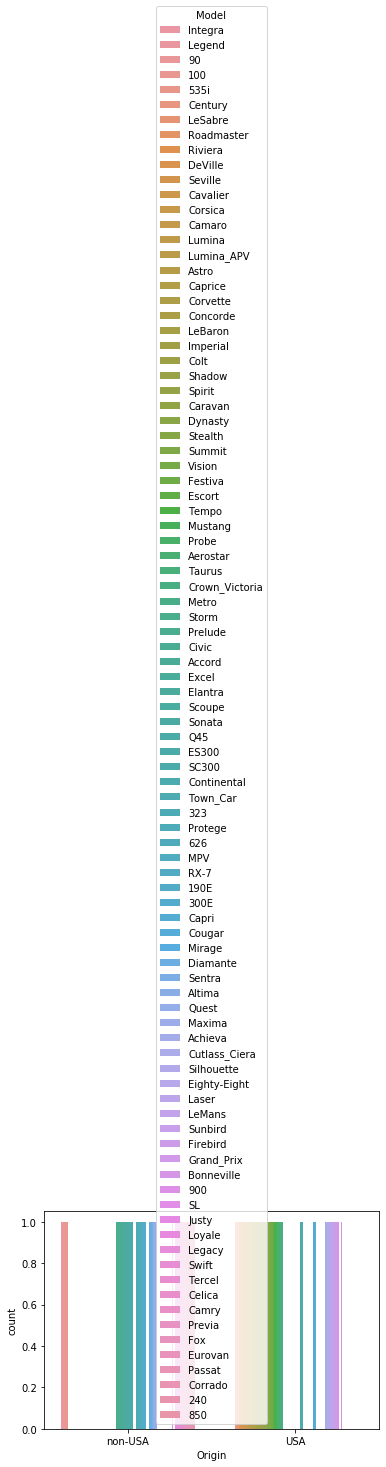

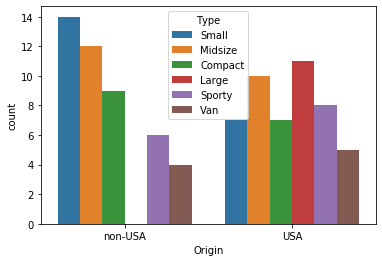

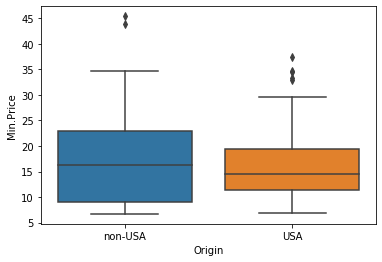

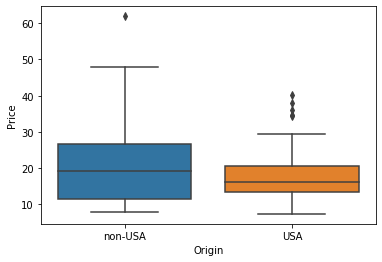

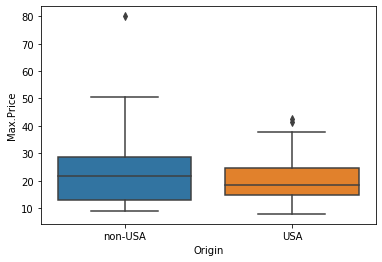

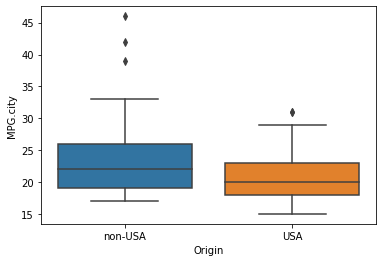

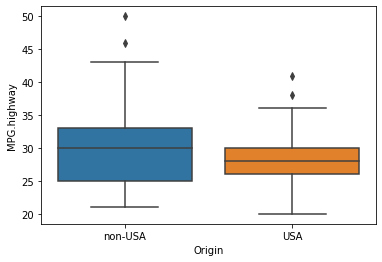

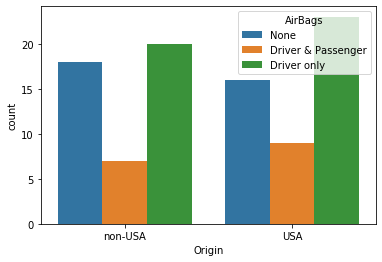

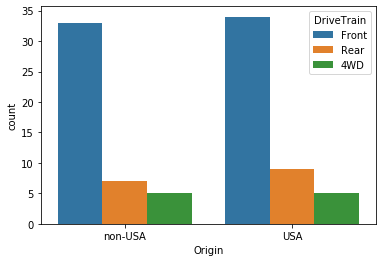

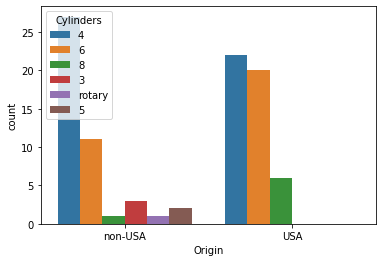

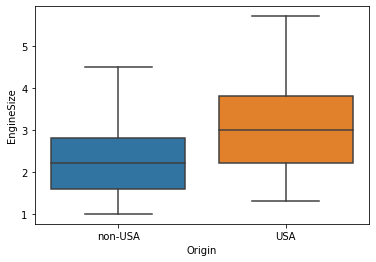

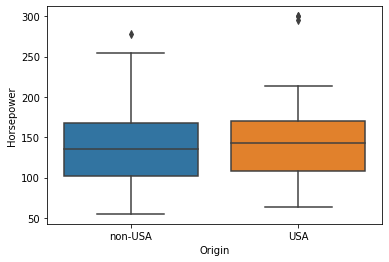

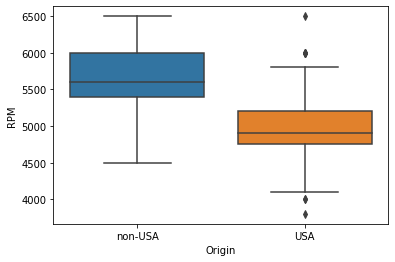

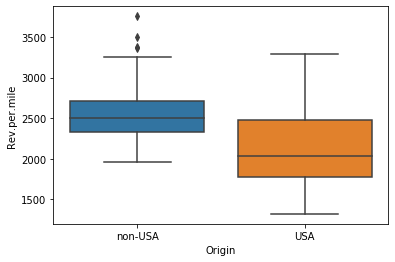

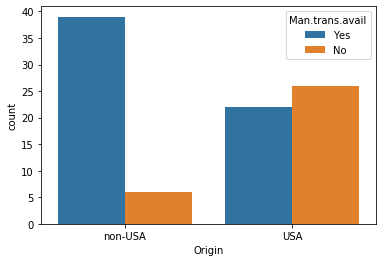

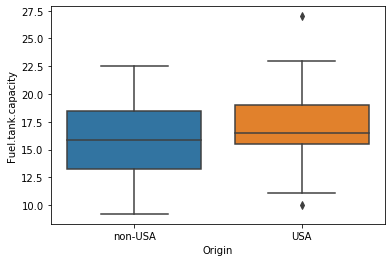

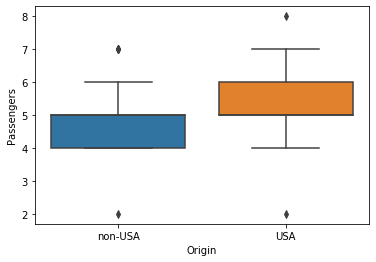

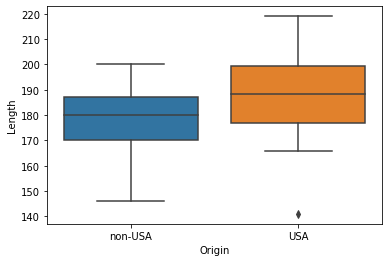

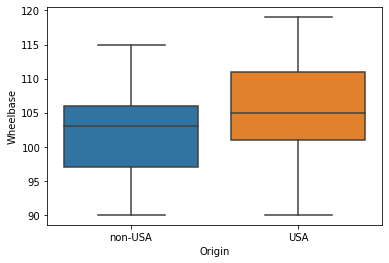

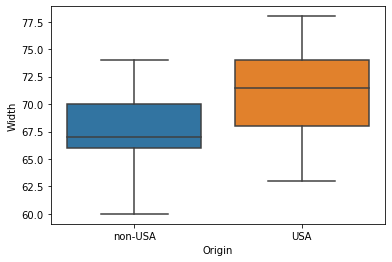

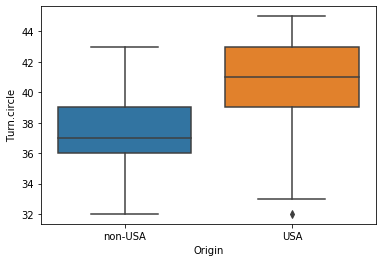

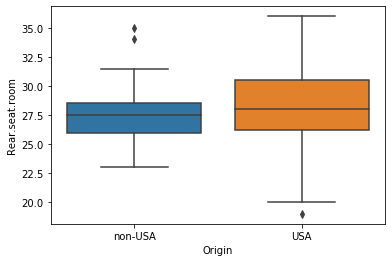

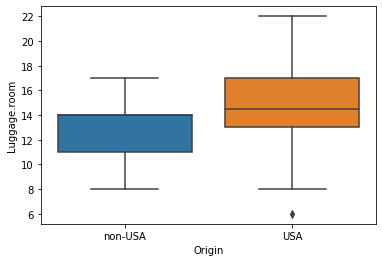

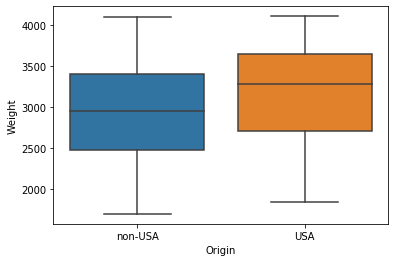

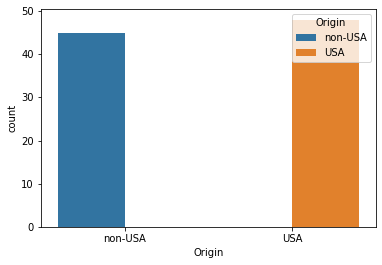

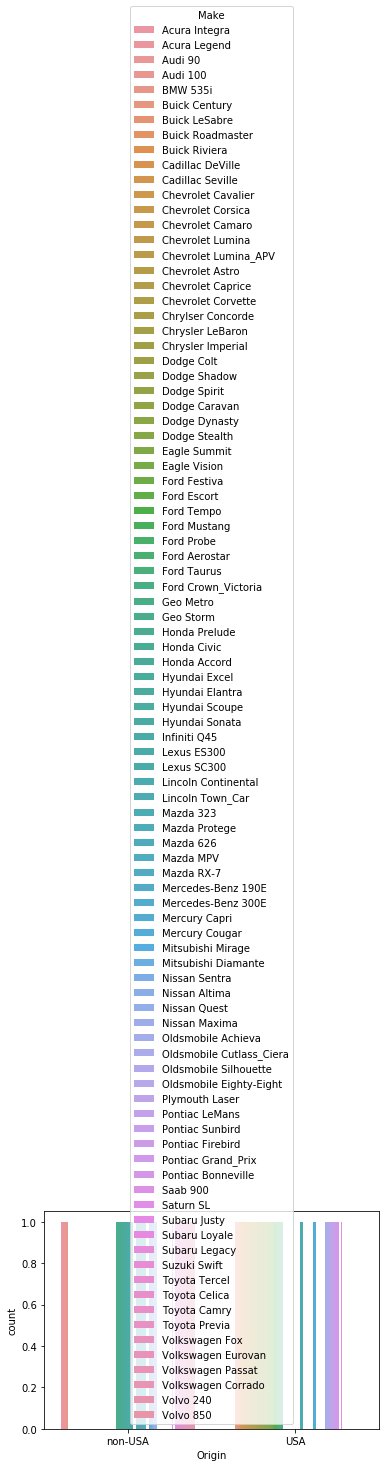

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
for i in A.columns:
   if(A[i].dtypes=="object"):
       sb.countplot(A.Origin,hue=A[i])
       plt.show()
   else:
       sb.boxplot(A.Origin,A[i])
       plt.show()

In [8]:

Y = A[["Origin"]]
X = A[["Length"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)


In [9]:


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

C:\Users\ashishkumd2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
pred

array(['non-USA', 'USA', 'USA', 'non-USA', 'USA', 'USA', 'non-USA',
       'non-USA', 'USA', 'USA', 'USA', 'non-USA', 'USA', 'non-USA',
       'non-USA', 'USA', 'non-USA', 'non-USA', 'USA'], dtype=object)

In [8]:

import pandas as pd
pp = pd.DataFrame(pred)
pp['predicted'] = pred
pp

,0,predicted
0,USA,USA
1,non-USA,non-USA
2,non-USA,non-USA
3,non-USA,non-USA
4,USA,USA
5,non-USA,non-USA
6,non-USA,non-USA
7,non-USA,non-USA
8,non-USA,non-USA
9,non-USA,non-USA


In [12]:

DD = xtest
DD['predicted'] = pred
DD.head()

C:\Users\ashishkumd2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Length,predicted
78,176,non-USA
8,198,USA
26,192,USA
81,179,non-USA
6,200,USA


In [13]:

DD['actual_origin'] = ytest
DD.head()

C:\Users\ashishkumd2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Length,predicted,actual_origin
78,176,non-USA,USA
8,198,USA,USA
26,192,USA,USA
81,179,non-USA,non-USA
6,200,USA,USA


In [14]:
DD[DD['predicted']!=DD['actual_origin']].count()


Length           8
predicted        8
actual_origin    8
dtype: int64

In [15]:


from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

#acc = trues/total


# In[125]:


#10 correct
10.0/19.0



0.5263157894736842

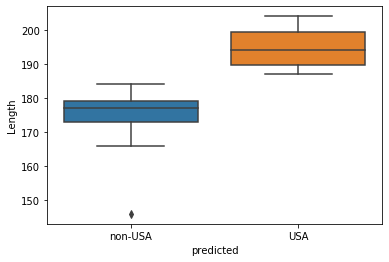

In [16]:
sb.boxplot(DD.predicted,DD.Length)
